In [59]:
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as skpre
import sklearn.cluster as skclus
import matplotlib.pyplot as plt
%matplotlib inline

folder = 'Data/'
animals = pd.read_csv(folder+'animals.csv')


print(len(animals))
animals[animals['Culmen Length (mm)'].isna()]

animals.drop(['Comments','Region','Stage','Individual ID'],axis=1,inplace=True)
animals.info()

animals[animals['Delta 15 N (o/oo)'].isna()]


animals.dropna(axis=0,inplace=True)

animals.info()

344
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    float64
 3   Body Mass (g)        342 non-null    float64
 4   Delta 15 N (o/oo)    330 non-null    float64
 5   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6)
memory usage: 16.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 1 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   330 non-null    float64
 1   Culmen Depth (mm)    330 non-null    float64
 2   Flipper Length (mm)  330 non-null    float64
 3   Body Mass (g)        330 non-null    float64
 4   Delta 15 N (o/oo)    330 non-null    float

In [60]:
# final prep steps
# normalized
norm_animals = skpre.scale(animals)


In [61]:
# run model and get results grouped with fit_predict
K = [2,3,4,5,6,7,8,9]
k2 = skclus.KMeans(n_clusters=K[0],random_state=0).fit_predict(norm_animals)
k3 = skclus.KMeans(n_clusters=K[1],random_state=0).fit_predict(norm_animals)
k4 = skclus.KMeans(n_clusters=K[2],random_state=0).fit_predict(norm_animals)
k5 = skclus.KMeans(n_clusters=K[3],random_state=0).fit_predict(norm_animals)
k6 = skclus.KMeans(n_clusters=K[4],random_state=0).fit_predict(norm_animals)
k7 = skclus.KMeans(n_clusters=K[5],random_state=0).fit_predict(norm_animals)
k8 = skclus.KMeans(n_clusters=K[6],random_state=0).fit_predict(norm_animals)
k9 = skclus.KMeans(n_clusters=K[7],random_state=0).fit_predict(norm_animals)

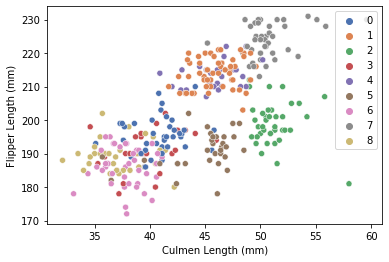

In [62]:
# choose two columns to plot for scatterplot
cul_length = animals['Culmen Length (mm)']
flip_length = animals['Flipper Length (mm)']

# attempt plotting
scatter = sns.scatterplot(x=cul_length, y=flip_length,hue=k9,palette='deep')

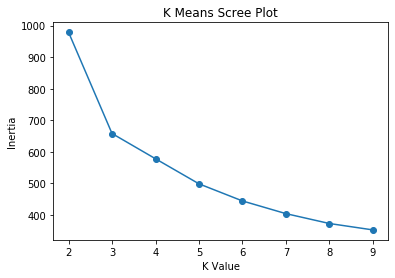

In [63]:
# make screeplot by running models again with just fit, to get intertia
k2 = skclus.KMeans(n_clusters=K[0],random_state=0).fit(norm_animals)
k3 = skclus.KMeans(n_clusters=K[1],random_state=0).fit(norm_animals)
k4 = skclus.KMeans(n_clusters=K[2],random_state=0).fit(norm_animals)
k5 = skclus.KMeans(n_clusters=K[3],random_state=0).fit(norm_animals)
k6 = skclus.KMeans(n_clusters=K[4],random_state=0).fit(norm_animals)
k7 = skclus.KMeans(n_clusters=K[5],random_state=0).fit(norm_animals)
k8 = skclus.KMeans(n_clusters=K[6],random_state=0).fit(norm_animals)
k9 = skclus.KMeans(n_clusters=K[7],random_state=0).fit(norm_animals)

Kscree = [k2.inertia_,k3.inertia_,k4.inertia_,k5.inertia_,k6.inertia_,k7.inertia_,k8.inertia_,k9.inertia_]
plt.plot(K,Kscree,marker='o')
plt.ylabel('Inertia')
plt.xlabel('K Value')
plt.title('K Means Scree Plot')
plt.show()